### Exploring the History of LEGO.

##### The Rebrickable database includes data on every LEGO set that has ever been sold; the names of the sets, what bricks they contain, what color the bricks are, etc. It might be small bricks, but this is big data! In this project, you will get to explore the Rebrickable database and answer a series of questions related to the history of Lego!

1.Reading Data

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#create dataframes
dfSet = pd.read_csv('sets.csv')
dfColor = pd.read_csv('colors.csv')

#take a look in the colors df
dfColor.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


2.Tratandos os dados

In [3]:
#search for duplicates
(dfColor[dfColor.duplicated()] == True)
(dfSet[dfSet.duplicated()] == True)

#search for nulls
dfColor.isnull().sum()
dfSet.isnull().sum()


set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

3.Exploring Colors

In [11]:
#count the values
dfColor['name'].value_counts()

#see how many colors it has
c = dfColor['name'].count()

#print colors
print(f'colors = {c}')


colors = 135


135

4.Transparent Colors in Lego Sets

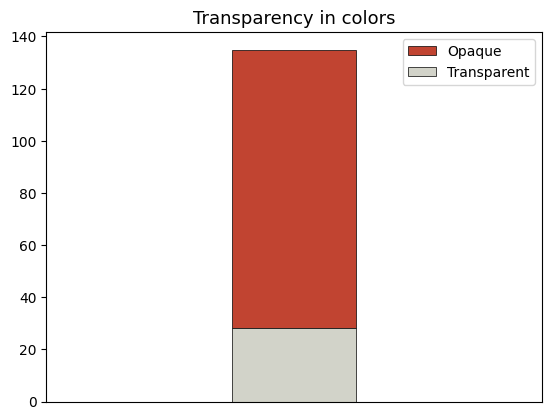

In [15]:
#group by transparent and non-transparent colors
t = dfColor[dfColor['is_trans'] == 't'].groupby('is_trans').size()
nt = dfColor[dfColor['is_trans'] == 'f'].groupby('is_trans').size()

#set width
w = 1

#create subplots figure
fig, ax = plt.subplots()

#plot the bars
ax.bar(2,height=nt, width=w, bottom=t,label= 'Opaque', edgecolor= 'black', linewidth= 0.5,color='#C14431')
ax.bar(2,height=t, width=w, label= 'Transparent', edgecolor= 'black', linewidth= 0.5,color='#D2D3C9')

#subplot config
plt.title('Transparency in colors',size=13)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim(0,4)
ax.legend()


5.Explore Lego Sets

In [6]:
#take a look in the sets dataframe
dfSet.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


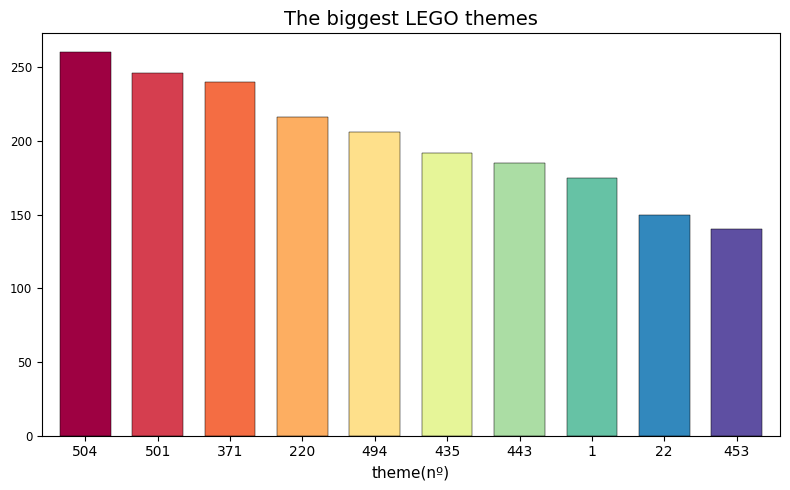

In [16]:
#set colors and width
colors = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
w = 0.7

#create subplot figure
fig, ax = plt.subplots(figsize=(8,5))

#count the values of 'theme_id'
theme = dfSet['theme_id'].value_counts()[:10]

#create bar plot
theme.plot.bar(width= w, edgecolor= 'black',linewidth= w/2,color=colors, rot= 0)

#set plot configs
ax.set_xlabel('theme(nº)', size=11)
plt.title('The biggest LEGO themes',size=14)
ax.tick_params(axis='x', which= 'major', labelsize= 10)
ax.tick_params(axis='y', which= 'major', labelsize= 8.5)
plt.tight_layout()


C:\Users\teste\AppData\Local\Temp\ipykernel_14168\1827709902.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_label)


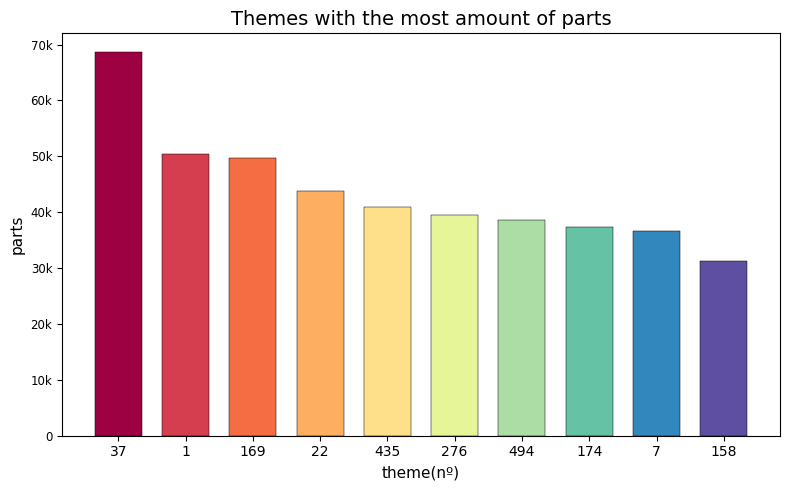

In [8]:
#set label
y_label = ['0','10k','20k','30k','40k','50k','60k','70k','90k']

#create subplot figure
fig,ax = plt.subplots(figsize=(8,5))

#group by theme and parts
parts = dfSet[['theme_id','num_parts']].groupby('theme_id').sum().sort_values(by='num_parts',ascending=False).reset_index()[:10]
parts['theme_id'] = parts['theme_id'].astype(str)

#create bar plot
plt.bar(x= parts['theme_id'], height= parts['num_parts'], color = colors, width= w, edgecolor= 'black',linewidth= w/2)

#set plot configs
ax.set_xlabel('theme(nº)', size=11)
ax.set_ylabel('parts', size=11)
ax.set_yticklabels(y_label)
ax.tick_params(axis='x', which= 'major', labelsize= 10)
ax.tick_params(axis='y', which= 'major', labelsize= 8.5)
plt.title('Themes with the most amount of parts',size=14)
plt.tight_layout()


6.Lego Themes Over Years

C:\Users\teste\AppData\Local\Temp\ipykernel_14168\2003939933.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(y_label)


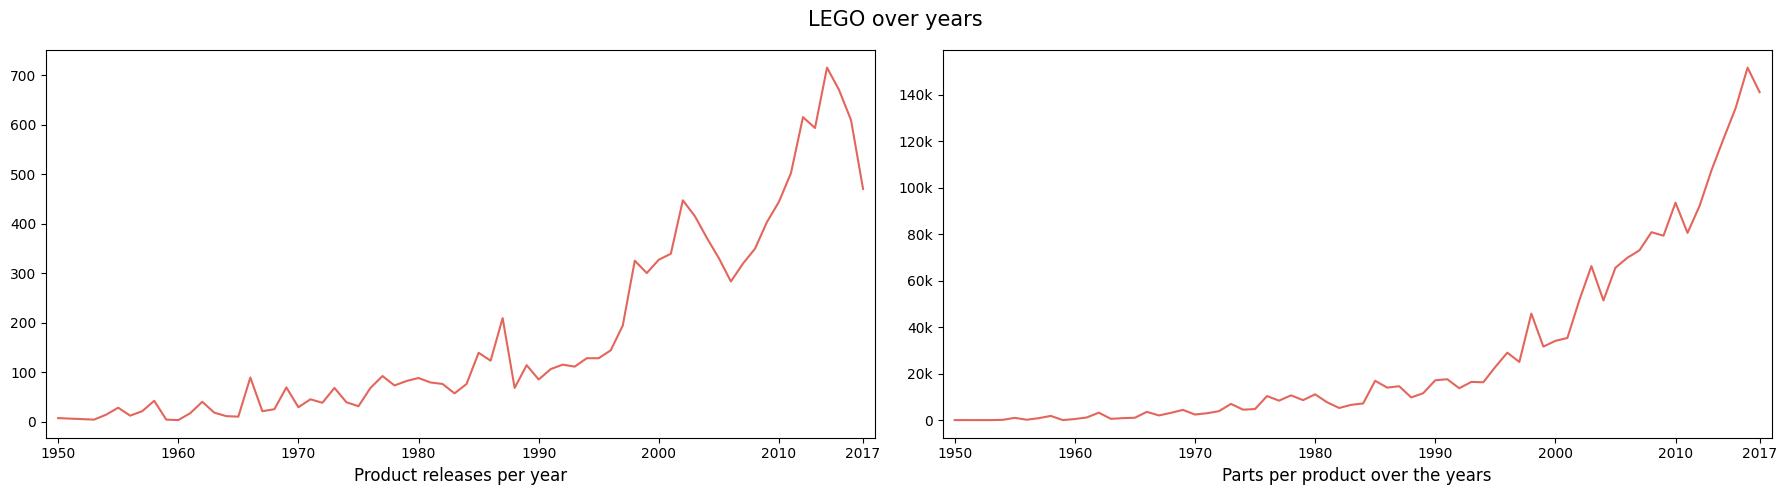

In [22]:
#set labels
y_label = ['0','0','20k','40k','60k','80k','100k','120k','140k']
labels = [1950,1960,1970,1980,1990,2000,2010,2017]

#create figure
fig,ax = plt.subplots(nrows= 1,ncols= 2,figsize=(18,5))

#group datas
products = dfSet.groupby('year').size()
parts_year = dfSet[['year','num_parts']].groupby('year').sum().reset_index()

#create the plots
products.plot(ax=ax[0], color= '#E3655B')
plt.plot(parts_year['year'], parts_year['num_parts'], color= '#E3655B')

#figure configs
for i in range(0,2):
    ax[i].set_xlim(1949,2018)
    ax[i].set_xticks(labels)
    ax[i].set_xticklabels([str(x) for x in labels])
ax[1].set_yticklabels(y_label)
ax[1].set_xlabel('Parts per product over the years', size= 12)
ax[0].set_xlabel('Product releases per year', size= 12)
fig.suptitle("LEGO over years", fontsize=15)
plt.tight_layout()
